In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import cm

from PIL import Image

<div style="text-align: center;">
    <span style="color: red; font-size: 60px;"> Esperienza 0 </span>
</div>

<center>

# <span style="color:blue;"> Analisi delle immagini </span>

<center>

In [5]:
col = 1224
row = 1024

### Analisi del rumore medio

In [4]:
appo = 0
mean_noise = 0

for i in range(1, 81):
    path = "Dati/CAMimages/dark2x2/dark" + "{:03d}".format(i) + ".tif"
    mean_noise = mean_noise * i/(i+1) + np.array(Image.open(path))/(i+1)

del appo
del path

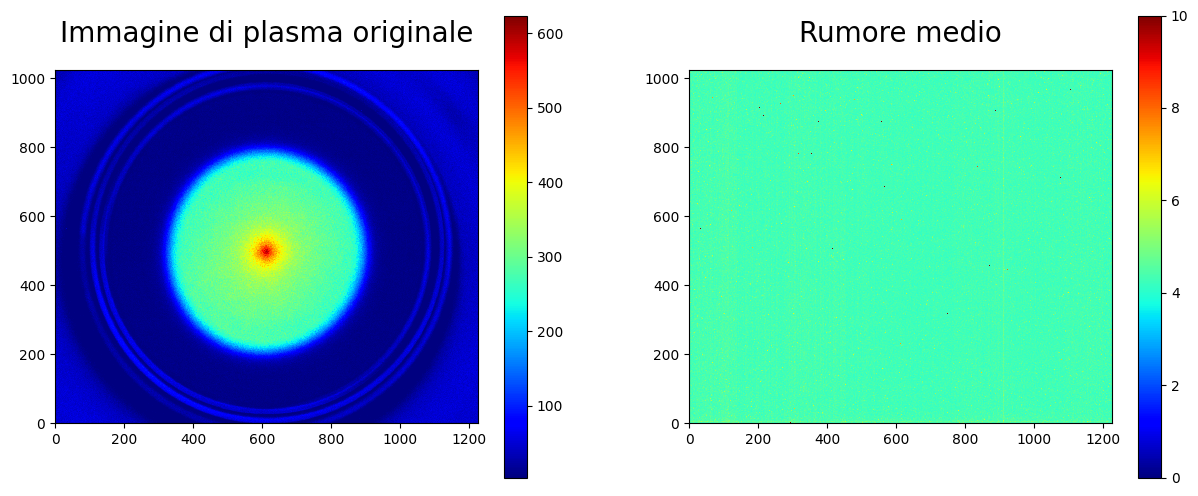

In [6]:
fig = plt.figure(figsize=(15, 6))

# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)


#--------------------------------------------------#
#                 Plasma originale                 #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 1)
inte = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))

# Faccio plot
cax = ax.pcolormesh(X, Y, inte, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Immagine di plasma originale', fontsize = 20, pad=20)


#--------------------------------------------------#
#              Calcolo rumore medio                #
#--------------------------------------------------#
ax = fig.add_subplot(1, 2, 2)
cax = ax.pcolormesh(X, Y, mean_noise, cmap='jet', vmin = 0, vmax = 10)
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Rumore medio', fontsize = 20, pad=20)

plt.show()

del inte
del x, y, X, Y

### Dimensioni della trappola

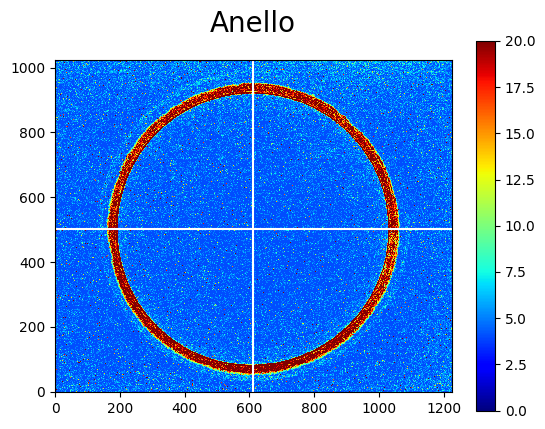

In [7]:
# Creo la griglia per gli output
x = np.linspace(0, col, col)
y = np.linspace(0, row, row)
X, Y = np.meshgrid(x, y)

ring = np.array(Image.open("Dati/CAMimages/ring2x2/ring1.tif"))

cax = plt.pcolormesh(X, Y, ring, cmap='jet', vmin = 0, vmax = 20)
plt.colorbar(cax); plt.gca().set_aspect('equal')
plt.title(f'Anello', fontsize = 20, pad=20)

plt.axhline(y=502, color='w', linestyle='-')
plt.axvline(x=612, color='w', linestyle='-')

plt.show()

del ring
del x, y, X, Y

Posso ora centrare le immagini in modo tale da effettuare dei controlli riguardo la dimensione della trappola: non ha senso che i pixel esterni si trovino ad un'intensità non nulla, poichè la loro influenza all'intensità totale è solo rumore. Il centro si trova in:
$$\left(x_c,\,y_c\right)\,=\,\left(612,\,502\right)$$

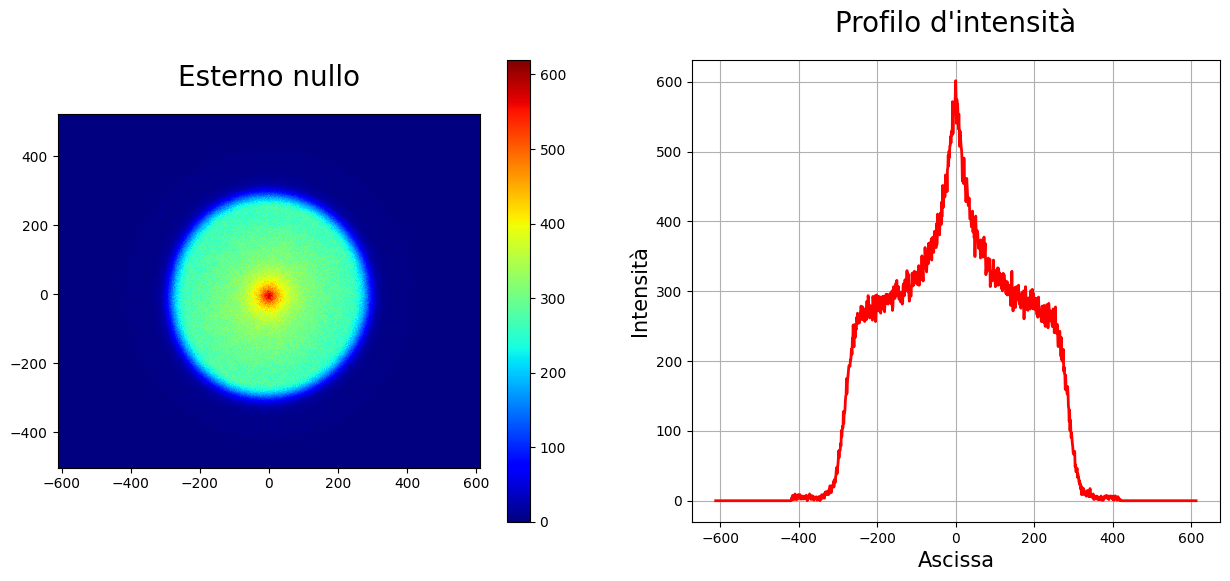

78193423.82716039


In [10]:
fig = plt.figure(figsize=(15, 6))

x = np.linspace(-col/2, col/2, col)
y = np.linspace(-row/2 + 10, row/2 + 10, row)

X, Y = np.meshgrid(x, y)

#-------------------------------------------------------------#
#              Immagine di plasma: esterno nullo              #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 1)
plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma - mean_noise

mask = plasma < 0
plasma[mask] = 0

mask = (X*X + Y*Y) > pow(419, 2)
plasma[mask] = 0

# Faccio plot
cax = ax.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Esterno nullo', fontsize = 20, pad=20)


#-------------------------------------------------------------#
#                      Profilo d'intensità                    #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 2)
plasma = plasma.reshape(1024, 1224)
prof = plasma[502,:]

ax.plot(x, prof, color = 'r', linestyle = '-',linewidth = 2)
ax.set_xlabel("Ascissa", fontsize = 15); ax.set_ylabel("Intensità", fontsize = 15); ax.grid(True)
ax.set_title(f"Profilo d'intensità", fontsize = 20, pad=20)

plt.show()
del x, y, X, Y
del prof, plasma, mask


### Riflessioni

Vogliamo togliere le riflessioni che causano un rumore non nullo nella regione della trappola in cui non è presente il plasma: per fare questo mediamo l'intensità sulla corona circolare presente fra raggio di plasma e parete della trappola in modo tale da poterla sottrare ed ottenere un'immagine finalmente pulita.

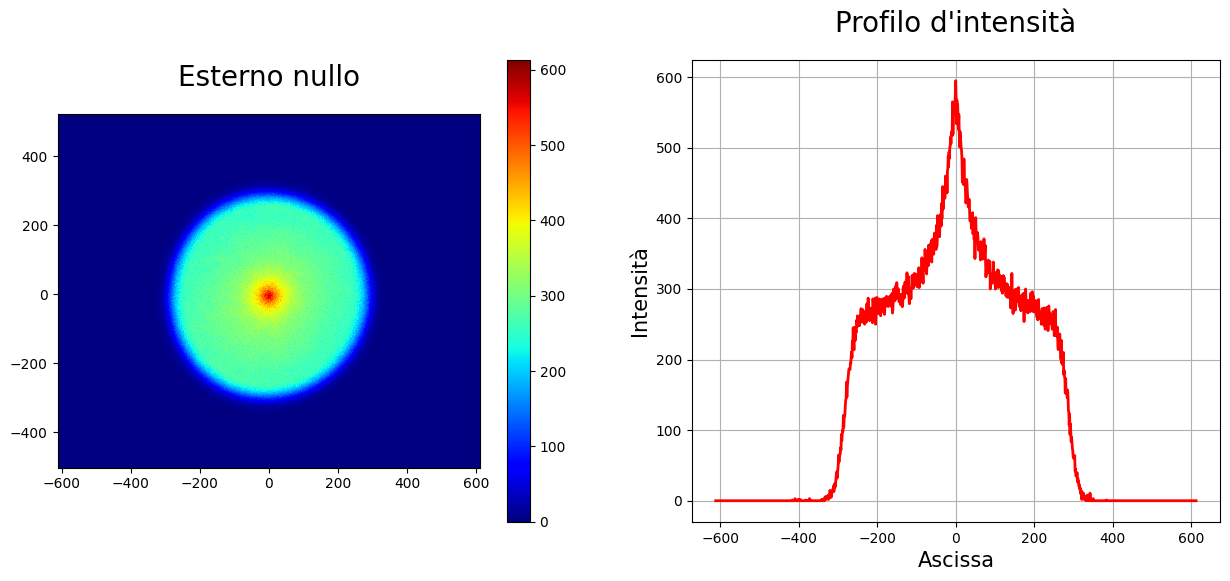

In [78]:
fig = plt.figure(figsize=(15, 6))

x = np.linspace(-col/2, col/2, col)
y = np.linspace(-row/2 + 10, row/2 + 10, row)

X, Y = np.meshgrid(x, y)

#-------------------------------------------------------------#
#              Immagine di plasma: esterno nullo              #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 1)
plasma = np.array(Image.open("Dati/CAMimages/plasma/plasma001.tif"))
plasma = plasma - mean_noise

mask = plasma < 0
plasma[mask] = 0

mask = (X*X + Y*Y) > pow(419, 2)
plasma[mask] = 0

mask = ((X*X + Y*Y) < pow(419, 2)) & ((X*X + Y*Y) > pow(320, 2))
appo = np.mean(plasma[mask])

mask = (X*X + Y*Y) < pow(419, 2)
plasma[mask] = plasma[mask] - appo

mask = plasma < 0
plasma[mask] = 0


# Faccio plot
cax = ax.pcolormesh(X, Y, plasma, cmap='jet')
plt.colorbar(cax); ax.set_aspect('equal')
ax.set_title(f'Esterno nullo', fontsize = 20, pad=20)


#-------------------------------------------------------------#
#                      Profilo d'intensità                    #
#-------------------------------------------------------------# 
ax = fig.add_subplot(1, 2, 2)
plasma = plasma.reshape(1024, 1224)
prof = plasma[502,:]

ax.plot(x, prof, color = 'r', linestyle = '-',linewidth = 2)
ax.set_xlabel("Ascissa", fontsize = 15); ax.set_ylabel("Intensità", fontsize = 15); ax.grid(True)
ax.set_title(f"Profilo d'intensità", fontsize = 20, pad=20)

plt.show()

del x, y, X, Y
del prof, plasma, appo, mean_noise

In [2]:
# Function to compute mean noise
def mean_noise(base, num_im):
    appo = 0
    m_noise = 0

    for i in range(1, num_im + 1):
        path = base + "{:03d}".format(i) + ".tif"
        m_noise = m_noise * i/(i+1) + np.array(Image.open(path))/(i+1)

    del appo
    return m_noise

# Function to set outside pixel to zero
def est_nullo(im, mean_noise, radius, xcen, ycen):
    x = np.linspaze(-xcen, col - xcen, col)
    y = np.linspaze(-ycen, row - ycen, row)

    # Creating mash grid to check wether we are in trap or not
    X, Y = np.meshgrid(x, y)
    
    plasma = plasma - mean_noise

    mask = plasma < 0
    plasma[mask] = 0

    mask = (X*X + Y*Y) > pow(radius, 2)
    plasma[mask] = 0

    appo = np.array(Image.open(path))

In [3]:
print(mean_noise("Dati/CAMimages/dark2x2/dark", 80))

[[4.16049383 4.25925926 4.48148148 ... 4.35802469 5.17283951 4.55555556]
 [4.50617284 4.51851852 4.43209877 ... 4.25925926 4.55555556 4.18518519]
 [4.48148148 4.28395062 4.35802469 ... 4.43209877 4.37037037 4.2345679 ]
 ...
 [4.58024691 4.61728395 4.24691358 ... 4.27160494 4.50617284 4.25925926]
 [4.62962963 4.22222222 4.32098765 ... 4.14814815 4.5308642  4.11111111]
 [4.28395062 4.20987654 4.30864198 ... 4.28395062 4.25925926 4.2962963 ]]


<center>

# <span style="color:blue;"> Studio della scarica </span>

<center>

In [79]:
def moving_av(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def exp_func(x, a, b):
    return a * np.exp(b * x)

<center>

### Scarica elettronica

</center>

In [89]:
filename = 'Dati/Signals/electron_discharge/rcdisch/rcdisch/rcdisch_01.txt'

# Lettura del file saltando le prime tre righe e specificando le colonne
data = pd.read_csv(filename, delim_whitespace=True, skiprows=3, header=None)

# Assegnazione delle colonne a t e v
t = data[0].astype(float)
v = data[1].astype(float)

v_smooth = moving_av(v, window_size = 100)
t = t[:len(v_smooth)]

In [90]:
# Fit esponenziale
popt, pcov = curve_fit(exp_func, t[40000:60000], v_smooth[40000:60000])
a, b = popt

print(f"Parametri ottimali: a = {a}, b = {b}")

t_fit = t[40000:60000]
v_fit = exp_func(t_fit, a, b)

Parametri ottimali: a = -6.440729131194055, b = -2.0849399671623443


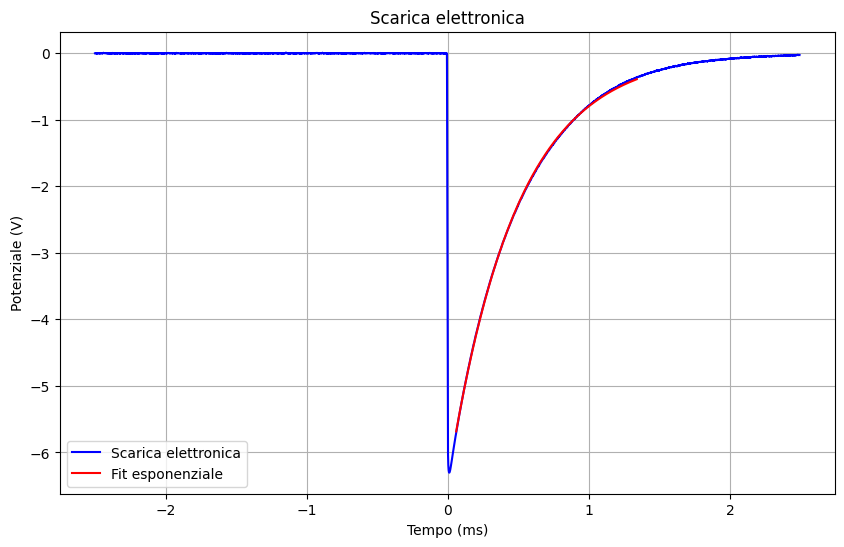

In [91]:
fig = plt.figure(figsize=(10, 6))

plt.plot(t, v_smooth, 'b-', label = 'Scarica elettronica')
plt.plot(t_fit, v_fit, 'r-', label='Fit esponenziale')
plt.xlabel('Tempo (ms)')
plt.ylabel('Potenziale (V)')
plt.title('Scarica elettronica')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
del t, t_fit, v, v_smooth, v_fit, a, b 

<center>

### Scarica ionica

</center>

In [92]:
filename = 'Dati/Signals/ion_discharge/cdisch/cdisch_01.txt'

# Lettura del file saltando le prime tre righe e specificando le colonne
data = pd.read_csv(filename, delim_whitespace=True, skiprows=3, header=None)

# Assegnazione delle colonne a t e v
t = data[0].astype(float)
v = data[1].astype(float)

v_smooth = moving_av(v, window_size = 100)
t = t[:len(v_smooth)]

In [93]:
# Fit esponenziale
t_fit = t[41000:60000]
popt, pcov = curve_fit(exp_func, t_fit, v_smooth[41000:60000])
a, b = popt

print(f"Parametri ottimali: a = {a}, b = {b}")


v_fit = exp_func(t_fit, a, b)

Parametri ottimali: a = 34.93091448836087, b = -2.4042757309993643


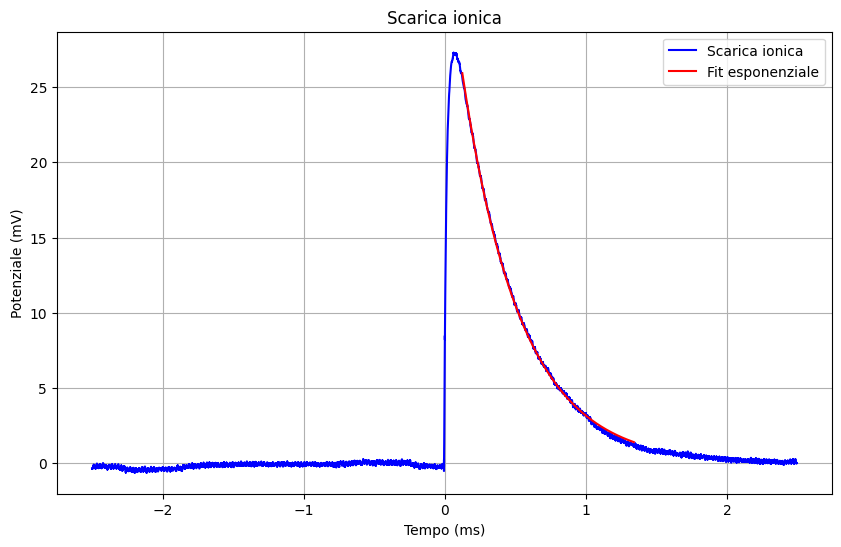

In [94]:
fig = plt.figure(figsize=(10, 6))

plt.plot(t, v_smooth, 'b-', label = 'Scarica ionica')
plt.plot(t_fit, v_fit, 'r-', label='Fit esponenziale')
plt.xlabel('Tempo (ms)')
plt.ylabel('Potenziale (mV)')
plt.title('Scarica ionica')
plt.grid(True)
plt.legend()
plt.show()

In [87]:
del t, t_fit, v, v_smooth, v_fit, a, b 